In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# 데이터 전처리
# 이미지를 [0, 1] 범위로 정규화
train_images = train_images.astype("float32") / 255
test_images = test_images.astype("float32") / 255

# 이미지 차원 확장 (28, 28, 1)
train_images = np.expand_dims(train_images, -1)
test_images = np.expand_dims(test_images, -1)

# 레이블 원-핫 인코딩
num_classes = 10
train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)

In [ ]:
# CNN 모델 구성
'''
model = keras.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation="softmax"),
])
'''
from tensorflow.keras import regularizers

model = keras.Sequential([
    # 첫 번째 컨볼루션 블록
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu',
                 input_shape=(28, 28, 1), padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    # 두 번째 컨볼루션 블록
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    # 세 번째 컨볼루션 블록 (추가된 부분)
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    # 완전 연결 층
    layers.Flatten(),
    layers.Dense(256, activation='relu',
                kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(128, activation='relu',
                kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    # 출력 층
    layers.Dense(num_classes, activation='softmax')
])

In [ ]:
# 모델 컴파일
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# 모델 요약 출력
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 7, 7, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 619,114 (2.36 MB)

 Trainable params: 617,450 (2.36 MB)

 Non-trainable params: 1,664 (6.50 KB)

In [ ]:
# 모델 훈련
'''
batch_size = 128
epochs = 15

history = model.fit(
    train_images, train_labels,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1
)
'''

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# 콜백 설정
callbacks = [
    # 조기 종료: 검증 손실이 5번 연속 개선되지 않으면 훈련 중지
    EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True),

    # 모델 체크포인트: 검증 정확도가 향상될 때마다 모델 저장
    ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max',
                   save_best_only=True, verbose=1),

    # 학습률 감소: 검증 손실이 3번 연속 개선되지 않으면 학습률 0.5배 감소
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
]

# 모델 컴파일 (최적화된 설정)
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 모델 훈련 (향상된 설정)
batch_size = 256  # 더 큰 배치 사이즈
epochs = 50       # 충분한 에포크 (조기 종료로 실제는 더 적을 수 있음)

history = model.fit(
    train_images, train_labels,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.9930 - loss: 0.0714
Epoch 1: val_accuracy improved from -inf to 0.99550, saving model to best_model.h5


211/211 ━━━━━━━━━━━━━━━━━━━━ 30s 75ms/step - accuracy: 0.9930 - loss: 0.0714 - val_accuracy: 0.9955 - val_loss: 0.0630 - learning_rate: 0.0010
Epoch 2/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9952 - loss: 0.0551
Epoch 2: val_accuracy did not improve from 0.99550
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9952 - loss: 0.0551 - val_accuracy: 0.9950 - val_loss: 0.0610 - learning_rate: 0.0010
Epoch 3/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9962 - loss: 0.0511
Epoch 3: val_accuracy did not improve from 0.99550
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9962 - loss: 0.0511 - val_accuracy: 0.9948 - val_loss: 0.0564 - learning_rate: 0.0010
Epoch 4/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9943 - loss: 0.0588
Epoch 4: val_accuracy did not improve from 0.99550
211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.9943 - loss: 0.0588 - val_accuracy: 0.9950 - val_loss: 0.0582 - learning_rate: 0.0010
Epoch 5/50
211/21

211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9960 - loss: 0.0514 - val_accuracy: 0.9960 - val_loss: 0.0542 - learning_rate: 0.0010
Epoch 6/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9957 - loss: 0.0508
Epoch 6: val_accuracy did not improve from 0.99600
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9957 - loss: 0.0508 - val_accuracy: 0.9940 - val_loss: 0.0601 - learning_rate: 0.0010
Epoch 7/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9953 - loss: 0.0529
Epoch 7: val_accuracy did not improve from 0.99600
211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.9953 - loss: 0.0529 - val_accuracy: 0.9955 - val_loss: 0.0555 - learning_rate: 0.0010
Epoch 8/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9962 - loss: 0.0501
Epoch 8: val_accuracy did not improve from 0.99600

Epoch 8: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9962 - loss: 0.0501 - val_a


Epoch 13: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9978 - loss: 0.0240 - val_accuracy: 0.9962 - val_loss: 0.0396 - learning_rate: 5.0000e-04
Epoch 14/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9984 - loss: 0.0231
Epoch 14: val_accuracy did not improve from 0.99617
211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.9984 - loss: 0.0231 - val_accuracy: 0.9952 - val_loss: 0.0329 - learning_rate: 2.5000e-04
Epoch 15/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9987 - loss: 0.0182
Epoch 15: val_accuracy improved from 0.99617 to 0.99683, saving model to best_model.h5


211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9987 - loss: 0.0182 - val_accuracy: 0.9968 - val_loss: 0.0274 - learning_rate: 2.5000e-04
Epoch 16/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9991 - loss: 0.0148
Epoch 16: val_accuracy did not improve from 0.99683
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9991 - loss: 0.0148 - val_accuracy: 0.9958 - val_loss: 0.0303 - learning_rate: 2.5000e-04
Epoch 17/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9989 - loss: 0.0142
Epoch 17: val_accuracy did not improve from 0.99683
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9989 - loss: 0.0142 - val_accuracy: 0.9965 - val_loss: 0.0270 - learning_rate: 2.5000e-04
Epoch 18/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9991 - loss: 0.0122
Epoch 18: val_accuracy did not improve from 0.99683
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9991 - loss: 0.0122 - val_accuracy: 0.9968 - val_loss: 0.0263 - learning_rate: 2.5000e

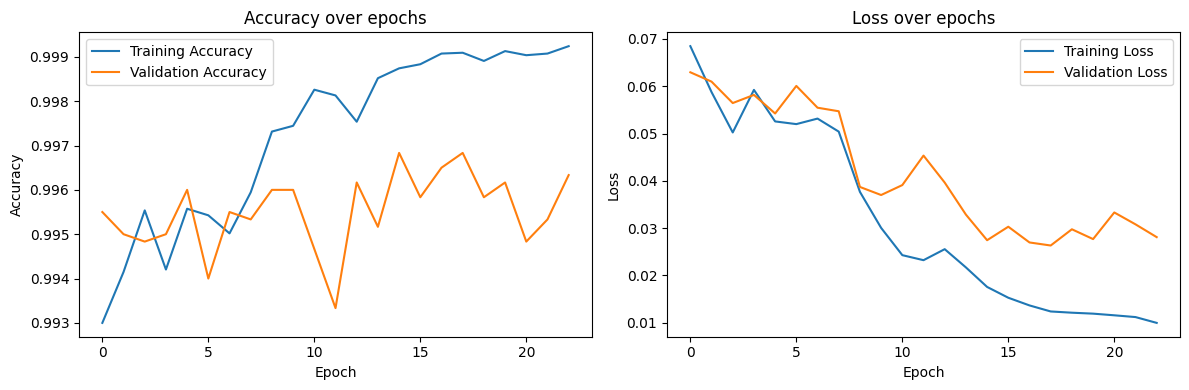

In [ ]:
# 훈련 과정 시각화
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


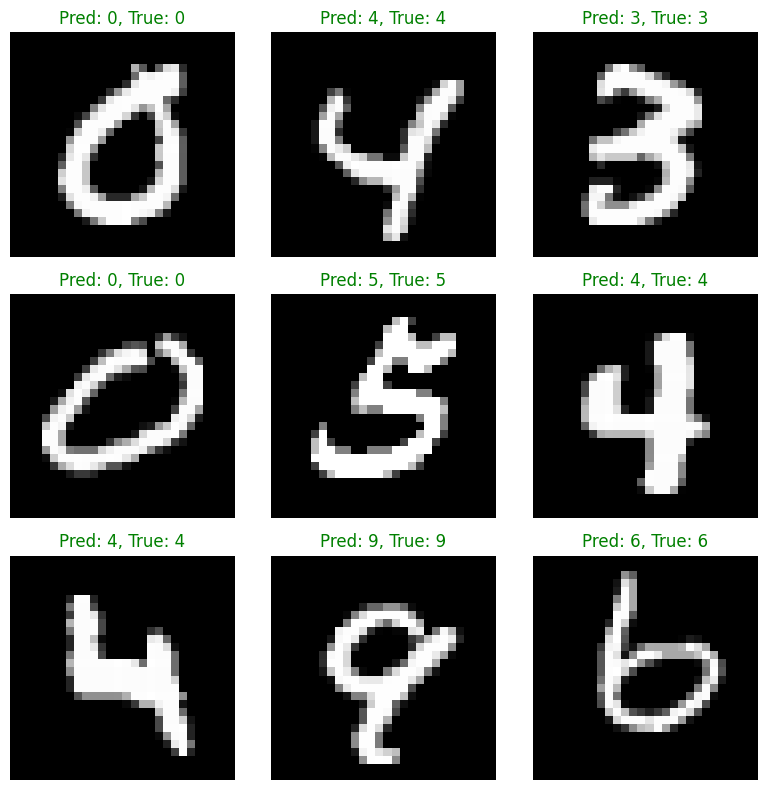

In [ ]:
# 예측 결과 샘플 확인
predictions = model.predict(test_images)
sample_idx = np.random.choice(len(test_images), 9)

plt.figure(figsize=(8, 8))
for i, idx in enumerate(sample_idx):
    plt.subplot(3, 3, i+1)
    plt.imshow(test_images[idx].reshape(28, 28), cmap='gray')
    pred_label = np.argmax(predictions[idx])
    true_label = np.argmax(test_labels[idx])
    plt.title(f"Pred: {pred_label}, True: {true_label}", color='green' if pred_label == true_label else 'red')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
score = model.evaluate(test_images, test_labels, verbose=0)
print(f"Test loss: {score[0]:.4f}")
print(f"Test accuracy: {score[1]:.4f}")

Test loss: 0.0232
Test accuracy: 0.9964
